# Part I - A complete Data Analysis of the Ford GoBike System Dataset
## by Barry Quist

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


### GATHERING DATA

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load dataset
df_FordGoBike = pd.read_csv('201902-fordgobike-tripdata.csv')

### ASSESSING DATA
 Both visual and programmatic assessement were used to assess the data.

In [3]:
df_FordGoBike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df_FordGoBike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df_FordGoBike.shape

(183412, 16)

In [6]:
df_FordGoBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# check for duplicates

sum(df_FordGoBike.duplicated())

0

### CLEANING DATA

In [8]:
# # Check for missing values

df_FordGoBike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# drop missing values/rows

df_FordGoBike.dropna(inplace=True)

In [10]:
# check if missing values have been dropped

df_FordGoBike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# convert start_time and end_time columns to datetime datatype

df_FordGoBike.start_time = pd.to_datetime(df_FordGoBike.start_time)
df_FordGoBike.end_time = pd.to_datetime(df_FordGoBike.end_time)

In [12]:
# convert member_birth_year to integer

df_FordGoBike['member_birth_year'] = df_FordGoBike['member_birth_year'].astype(int)

In [13]:
# convert user_type, member_gender, bike_share_for_all_trip columns to categorical datatypes

var_dict = {'user_type': ['Customer','Subscriber'],
                    'member_gender': ['Male', 'Female', 'Other'],
                    'bike_share_for_all_trip': ['Yes', 'No']}

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var_dict[var])
    df_FordGoBike[var] = df_FordGoBike[var].astype(ordered_var)


In [14]:
df_FordGoBike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> There was a total of 183,412 bike trips in the month of February 2019. But after the wrangling process, there was in total 174,952 bike trips legitimately recorded. The dataset records the duration(sec), start/end times, bike id, user type, member birthyear, member gender,  start/end station ids,names,longitudes and latitudes and lastly bike share for all trip

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the gender group that frequently used the bikesystem
> Also interested in the different age groups that used the bikesystem

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The member_gender will give me an insight to the gender of the individual riders that constituted the most share of bike riding in the month. Also, member_birth_year will provide insights on biker ages.

## Univariate Exploration

## Question 1
What is the distribution of Gender across bike trips and which gender was popular among the bike sharing system?

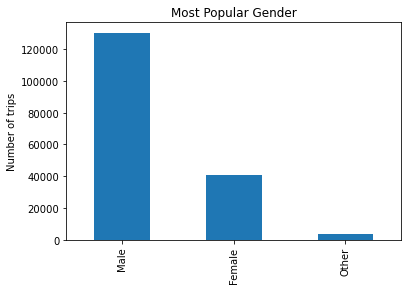

In [26]:
df_FordGoBike.member_gender.value_counts().plot.bar()
plt.title('Most Popular Gender')
plt.ylabel('Number of trips');

## Observation
From the plot, we can observe that the Male gender patronized the bikesharing system than Female and Other Genders

## Question 2
What are the different user types recorded and which user type is popular with the system?

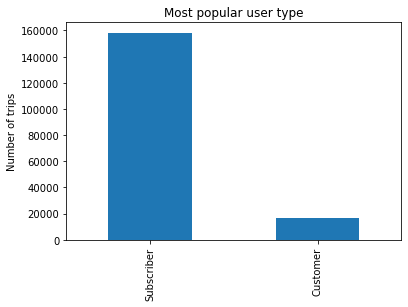

In [25]:
df_FordGoBike['user_type'].value_counts().plot(kind='bar');
plt.title('Most popular user type')
plt.ylabel('Number of trips');

### Observation
It was observed that it was more preferred to be a subscriber of the system than to be a customer.  About 90% of people in the San Francisco Bay were subscribers to the Bike share system

## Question 3
What is the average duration of a bike trip?

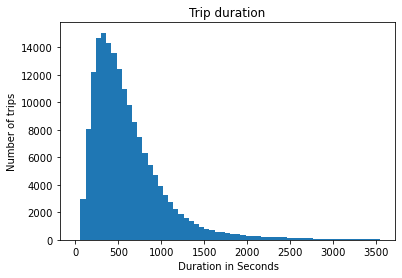

In [27]:
bins = np.arange(0, 3600,60) 

plt.hist(data = df_FordGoBike, x = 'duration_sec', bins=bins)
plt.title("Trip duration")
plt.xlabel(' Duration in Seconds')
plt.ylabel('Number of trips');

## Observation
Most of the trips lasted around 500 seconds. It is also observed that the greater the duration the lesser the bike trips

## Question 4
Where users comfortable sharing their trip details?

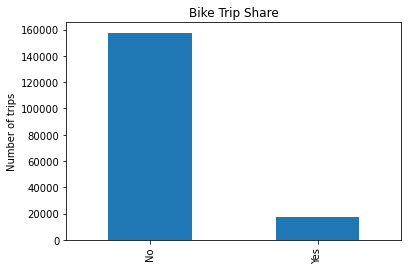

In [28]:
df_FordGoBike['bike_share_for_all_trip'].value_counts().plot(kind='bar');
plt.title('Bike Trip Share')
plt.ylabel('Number of trips');

## Observation
A lot more Bike users were not comfortable to share their bike trip details 

## Question 5
What is the distribution across member birth years?


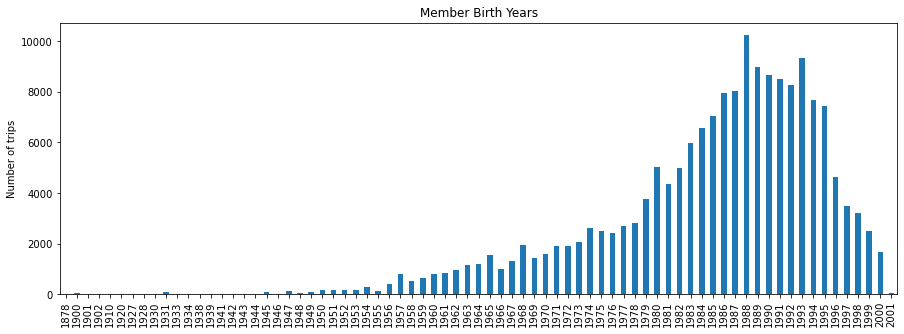

In [35]:
df_FordGoBike['member_birth_year'].value_counts().sort_index().plot(kind='bar',figsize= (15,5));
plt.title('Member Birth Years')
plt.ylabel('Number of trips');

## Observation
It was observed that people born in 1988 were the most frequent riders among thee rest of the birth year distribution. However it was discovered that there are some outliers. That is birthyears: 1878, 1900, 1901, 1902, 1910, 1920, 1927, 1928 which are not realistic since these age groups would not have the strength to ride.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> It was realised there was a lot more male patronage. The ratio between male and female usage was vast which in some cases might be unusual. All the same, there were no transformations required.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were some member years that were unusual. From 1878 to 1949 are ages that seem unlikely to ride bicycles. There haven't been any transformations performed yet.

## Bivariate Exploration


## Question 6
What is the relationship between Member ages and Member genders

In [36]:
# Create a new column for member ages.

df_FordGoBike['member_age'] = 2019- df_FordGoBike['member_birth_year']


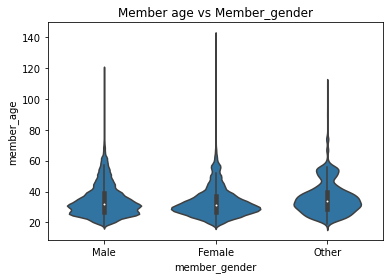

In [114]:
sb.violinplot(data=df_FordGoBike, x='member_gender', y='member_age', color=sb.color_palette()[0])
plt.title('Member age vs Member_gender');

## Observation
There are were a lot more riders around age 30

## Question 7
What is the correlation between Distance and member Gender

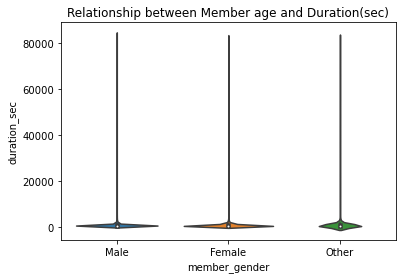

In [117]:
sb.violinplot(data=df_FordGoBike, x='member_gender', y='duration_sec')
plt.title('Relationship between Member age and Duration(sec)');

## Observation
The other Gender had few people making bike trips. This might be due to old age

## Question 8
Is there a relationship between user_type and duration?

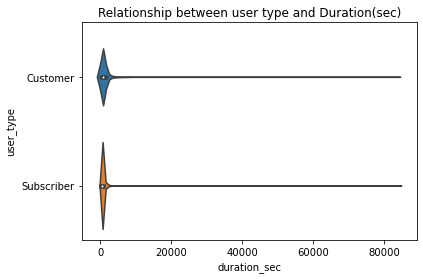

In [82]:
sb.violinplot(data=df_FordGoBike, x='duration_sec', y='user_type')
plt.title('Relationship between user type and Duration(sec)');

## Observation
Customer has a larger distribution of Duration in seconds to that of subscriber

## Question 9
What is the relationship between member age and duration

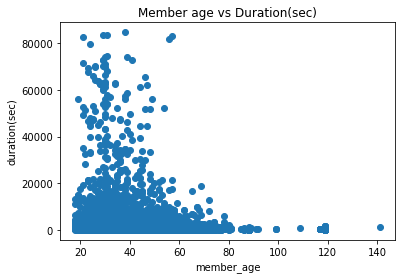

In [68]:
plt.scatter(data=df_FordGoBike, x='member_age', y='duration_sec')
plt.title('Member age vs Duration(sec)')
plt.xlabel('member_age')
plt.ylabel('duration(sec)');


## Observation
There is a negative relationship between these two variables. The older the biker the fewer the duration or time on the road.

## Quesion 10
What is the distribution of bike user type across member gender?

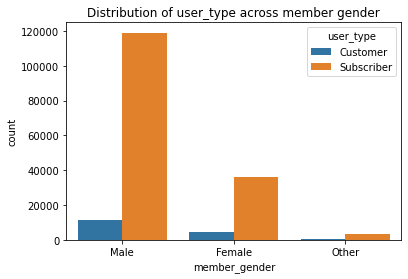

In [72]:
sb.countplot(data = df_FordGoBike, x = 'member_gender', hue = 'user_type')
plt.title('Distribution of user_type across member gender');

## Observation
All genders were popular with the subscription user_type as compared to customer

## Question 11
What is the distribution of Bike share for all trips across Member Gender?

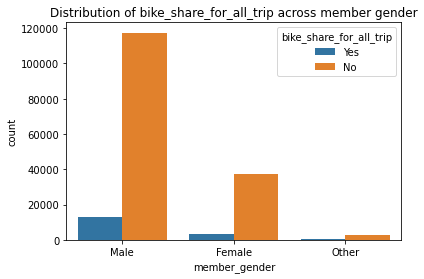

In [71]:
sb.countplot(data = df_FordGoBike, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.title('Distribution of bike_share_for_all_trip across member gender');

## Observation
All genders were not comfortable sharing bike trip details

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was a negative relationship between member age and duration. It was observed from the plot that the older the biker, the lesser the duration spent on the road.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> All genders preferred not to share the bike trip details. Majority of all genders were subscribers.

## Multivariate Exploration

## Question 12
What is the relationship between member gender and duration against user type?

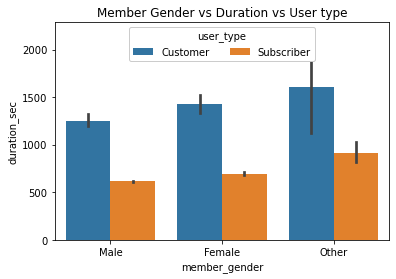

In [98]:
x = sb.barplot(data = df_FordGoBike, x = 'member_gender', y = 'duration_sec', hue = 'user_type')
x.legend(loc = 9, ncol = 3, framealpha = 1, title = 'user_type')
plt.title('Member Gender vs Duration vs User type');

## Observation
Other Customers travelled the most duration. Also male subscribers travelled the least duration 

## Question 13
What is the relationship between user type and duration against member gender?

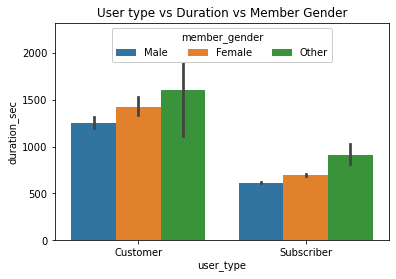

In [106]:
ax = sb.barplot(data = df_FordGoBike, x = 'user_type', y = 'duration_sec', hue = 'member_gender')
ax.legend(loc = 9, ncol = 3, framealpha = 1, title = 'member_gender')
plt.title('User type vs Duration vs Member Gender');

## Observation
All genders with Customer user type had more time on the road than all genders with subscriber user type

## Question 14
What is the relationship between member gender and duration across bike share?

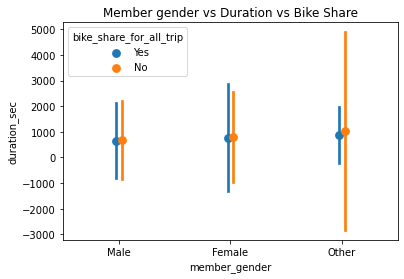

In [110]:
sb.pointplot(data = df_FordGoBike, x = 'member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
                  ci = 'sd', dodge = True, linestyles = "")
plt.title('Member gender vs Duration vs Bike Share');

## Observation
There is an extension of the plot into negative duration

## Question 15
What is the relationship between member age and member gender across user type?

C:\Users\Quist\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Quist\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


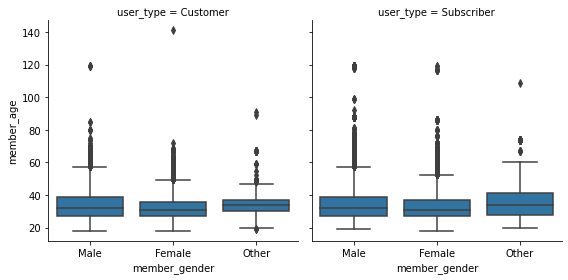

In [112]:
a = sb.FacetGrid(data = df_FordGoBike, col = 'user_type', size = 4)
a.map(sb.boxplot, 'member_gender', 'member_age');

## Observation
It was observed that there were more outliers in ages of subscribers than of customers. All genders had outliers though

## Conclusions
>According to the dataset, there were a lot more Male riders than Female and other genders. Majority preferred to be subscribers than Customers. Also bikers preferred not to share their bike trips. The was a relationship between biker age and duration. The older a biker is, the less duration of distance covered.
